In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

What question am I attempting to answer?

What metric/value do I want to measure to answer this question?

Do I expect the groups to be different in a specific way? (i.e. one group greater than the other).

Or do I just think they'll be different, but don't know how?






- Q3. Do different regions have different charges, on average? 

Hypothesis, Yes

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [3]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [4]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [5]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

In [6]:
table2 = pd.crosstab(df['charges'], df['smoker'])
table2

smoker,no,yes
charges,,
1121.87390,1,0
1131.50660,1,0
1135.94070,1,0
1136.39940,1,0
1137.01100,1,0
...,...,...
55135.40209,0,1
58571.07448,0,1
60021.39897,0,1


In [7]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table2)
chi2, p, deg_free, expected_vals = result

In [8]:
# What was our p-value?
print(p)
p<.05

0.47943654572545824


False

In [9]:
table3 = pd.crosstab(df['charges'], df['region'])
table3

region,northeast,northwest,southeast,southwest
charges,,,,
1121.87390,0,0,1,0
1131.50660,0,0,1,0
1135.94070,0,0,1,0
1136.39940,0,0,1,0
1137.01100,0,0,1,0
...,...,...,...,...
55135.40209,0,1,0,0
58571.07448,1,0,0,0
60021.39897,0,1,0,0


In [10]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table3)
chi2, p, deg_free, expected_vals = result

In [11]:
# What was our p-value?
print(p)
p<.05

0.4703353426605913


False

## Q1. Do smokers have higher insurance charges than non-smokers?

Null, these features dont effect each other

Hypothesis, Yes smokers have higher charges



<AxesSubplot:xlabel='charges', ylabel='smoker'>

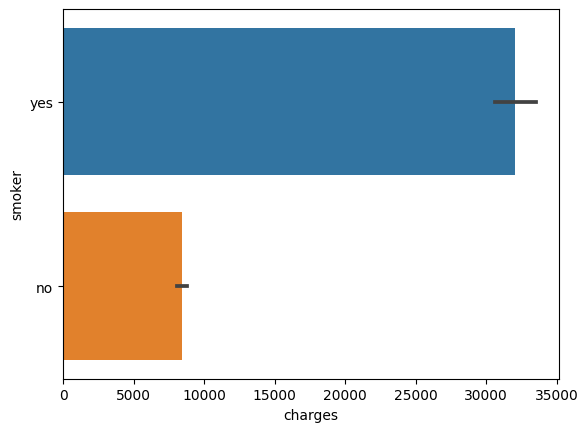

In [12]:
sns.barplot(data=df, x='charges', y='smoker')

In [ ]:
table2 = pd.crosstab(df['charges'], df['smoker'])
table2

In [43]:
stats.chi2_contingency(table2)
# p value is less than .05. we reject the Null

(1338.0,
 0.47943654572545824,
 1336,
 array([[0.79521674, 0.20478326],
        [0.79521674, 0.20478326],
        [0.79521674, 0.20478326],
        ...,
        [0.79521674, 0.20478326],
        [0.79521674, 0.20478326],
        [0.79521674, 0.20478326]]))

## Q2. Are men more likely to smoke than women?

Null, no 
Hypothesis, Yes

<AxesSubplot:xlabel='sex', ylabel='count'>

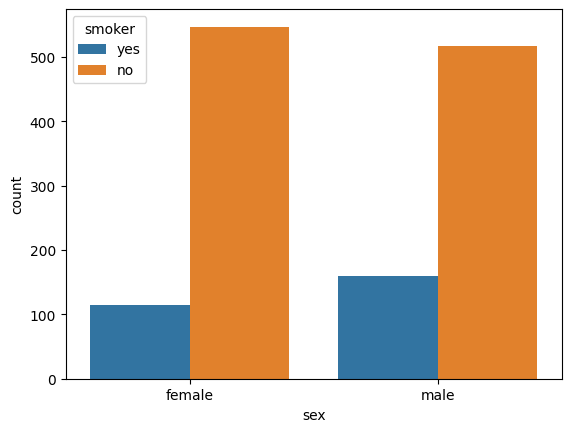

In [13]:
sns.countplot(data=df, x='sex', hue= 'smoker')

In [37]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [38]:
stats.chi2_contingency(table)
# p value is less than .05. we reject the Null

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

## - Q3. Do different regions have different charges, on average? 

Null, no
Hypothesis, Yes

<AxesSubplot:xlabel='charges', ylabel='region'>

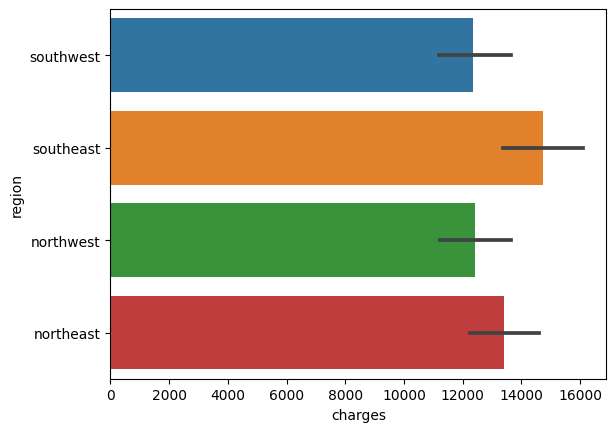

In [14]:
sns.barplot(data=df, x='charges', y= 'region')

In [26]:
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [27]:
# dealing with outliers
groups_cln = {}

## Loop through groups dict
for region, grp_data in groups.items():
    
    ## determine if there are any outliers
    idx_outliers =  np.abs(stats.zscore(grp_data)) > 3

    ## print a statement about how many outliers for which group name
    print(f"There were {idx_outliers.sum()} outliers in {region}")
    ## Remove the outiers from data and overwrite the region data in the dict
    
    grp_data_cln = grp_data[idx_outliers==False]
    
    groups_cln[region] = grp_data_cln

There were 8 outliers in southwest
There were 2 outliers in southeast
There were 7 outliers in northwest
There were 4 outliers in northeast


In [28]:
# Normalize the data
norm_results = {}
for i, data in groups_cln.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat, 'reject': p<.05}

## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df


,n,p,test stat,reject
southwest,317,0.0,97.223886,True
southeast,362,0.0,58.544942,True
northwest,318,0.0,85.341045,True
northeast,320,0.0,75.749565,True


In [29]:
## Use Levene's test for equal variance
stats.levene(*groups_cln.values())

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

In [30]:
## Run final test and get p-value
stats.kruskal(*groups_cln.values())
# Greater than .05 so we reject the null

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

## Conclusion

The p values we tested for less than 0.05 for smokers having higher insurance charges and men smoking more than women. In these cases we reject the Null and fail to reject our 2nd Hypothesis as we found the statistics significant

However for different regions having different charges on average we found that the p value was greater than 0.05 which means the data we tested was statistically insignificant. In this case we fail to reject our Null Hypothesis and reject our 2nd Hypothesis